In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
df = pd.read_csv('../data/hotel_booking_clean.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Functions

# Univariate Analysis

In this section, we will dive into each features doing a univariate analysis. This will give us indepth insights of each feature.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118897 entries, 0 to 118896
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  object 
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal            

## Target Variable

0 represents not cancelled and 1 represents cancelled

In [3]:
df['is_canceled'].value_counts()

is_canceled
0    74744
1    44153
Name: count, dtype: int64

In [4]:
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    62.864496
1    37.135504
Name: proportion, dtype: float64

In [5]:
df['is_canceled'].value_counts().values

array([74744, 44153])

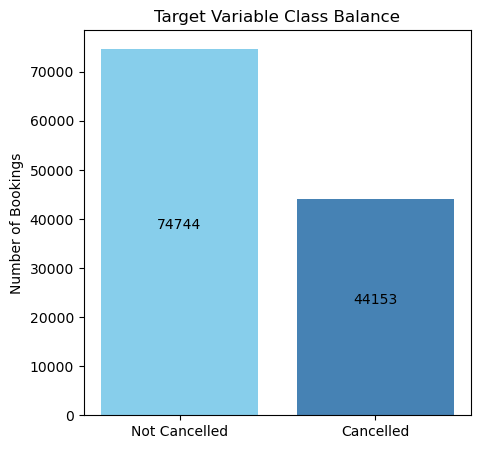

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

x_values = df['is_canceled'].value_counts().sort_index().values
y_values = ['Not Cancelled','Cancelled']

percentages = df['is_canceled'].value_counts(normalize="true").sort_index().values * 100

bars = ax.bar(y_values, x_values, color=["skyblue","steelblue"])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height/2,
        f"{int(height)}",
        ha = "center",
        va = "bottom"
    )

ax.set_title('Target Variable Class Balance')
ax.set_ylabel('Number of Bookings')

plt.show()

In [7]:
df.is_canceled.unique()

array([0, 1])

the class balance for the target variable is relatively healthy 62% (class 0) and 37% (class 1) respectively. Therefore, I do not see any reason to resample or take action here. This may change later on after data preprocessing

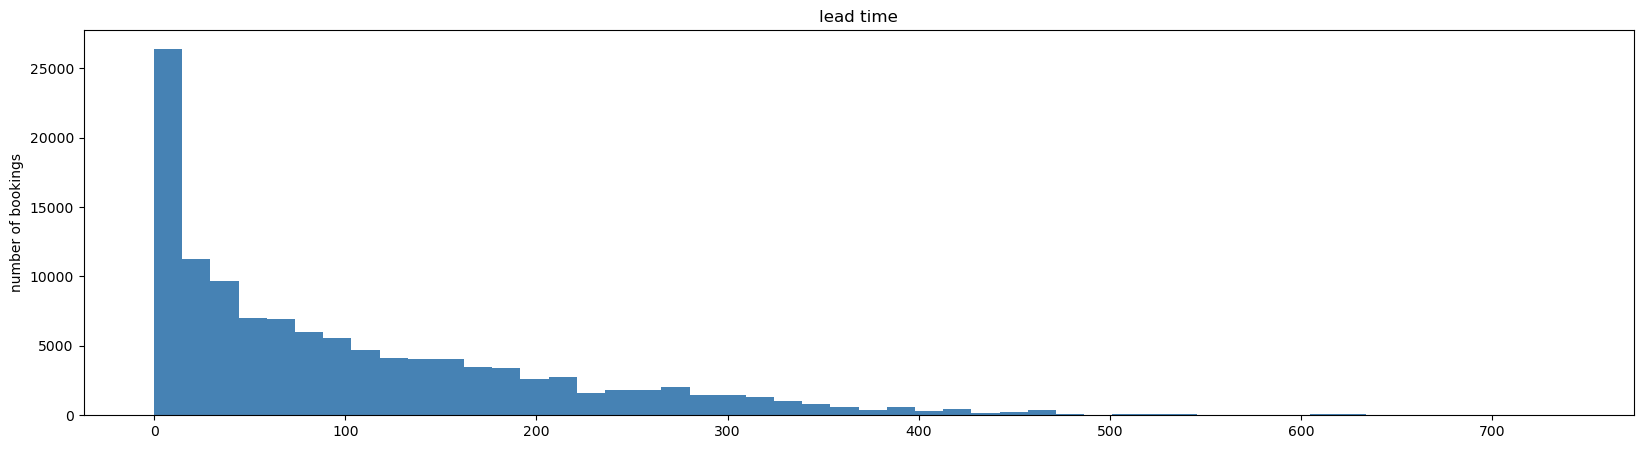

In [22]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(df['lead_time'], bins=50, color="steelblue")
ax.set_title("lead time")
ax.set_ylabel("number of bookings")

plt.show()